Importing the essential libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Reading the data


In [3]:
data = pd.read_excel(r"C:\Users\karun\Downloads\portfolio project 1\Intern\Task for internshio\family_financial_and_transactions_data.xlsx")
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [4]:
data.describe()

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,2024-10-16 00:34:31.777259776,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,2024-10-01 00:00:00,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,2024-10-08 00:00:00,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,2024-10-16 00:00:00,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,2024-10-24 00:00:00,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,2024-10-31 00:00:00,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000
std,NaN,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [6]:
data.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [7]:
data['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [8]:
family = data.groupby('Family ID').agg(Total_Spending =('Amount','sum'),
                                       Average_Spending =('Amount','mean')).reset_index()
family.head()

,Family ID,Total_Spending,Average_Spending
0,FAM001,23188.90,249.343011
1,FAM002,22309.71,253.519432
2,FAM003,11220.34,238.730638
3,FAM004,23483.10,247.190526
4,FAM005,40246.21,243.916424


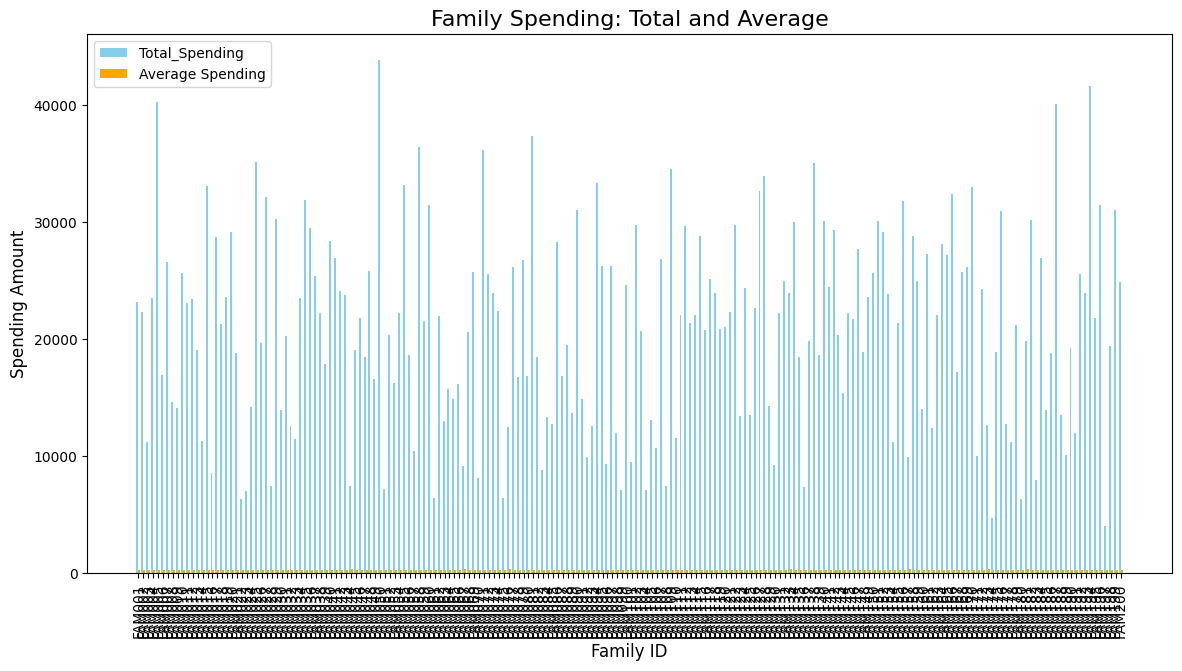

In [9]:
data1 = pd.DataFrame(family)

family1 = family['Family ID']
total_spending = family['Total_Spending']
avg_spending = family['Average_Spending']


x = np.arange(len(family1))
width = 0.4

plt.figure(figsize=(14,7))

plt.bar(x-width/2,total_spending,width,label='Total_Spending',color='skyblue')

plt.bar(x+width/2,avg_spending,width,label='Average Spending',color='orange')

plt.title('Family Spending: Total and Average',fontsize=16)
plt.xlabel('Family ID',fontsize=12)
plt.ylabel('Spending Amount',fontsize=12)
plt.xticks(x,family1,rotation=90)
plt.legend()
plt.show()







In [10]:
category =  data.groupby(['Family ID','Category']).agg(total_spending=('Amount','sum')).reset_index()
category.head()

,Family ID,Category,total_spending
0,FAM001,Education,2251.01
1,FAM001,Entertainment,4168.86
2,FAM001,Food,4380.92
3,FAM001,Groceries,3410.61
4,FAM001,Healthcare,1575.89


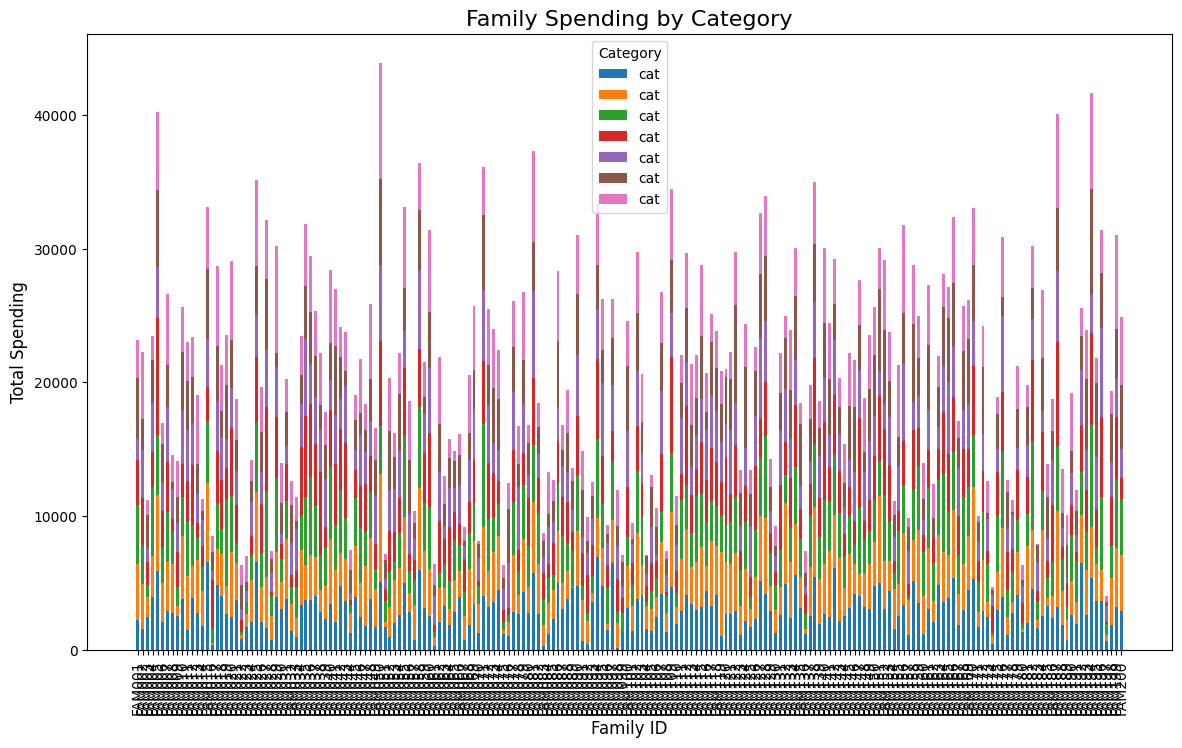

In [11]:
family2 = category['Family ID'].unique()
category1 = category['Category'].unique()

category_pivot = category.pivot_table(index='Family ID',columns='Category',values='total_spending',aggfunc='sum',fill_value=0)

x = np.arange(len(family2))
width = 0.6
bottom = np.zeros(len(family2))

plt.figure(figsize=(14,8))

for cat in category1:

 plt.bar(x,category_pivot[cat],width,label='cat',bottom=bottom)
 bottom+= category_pivot[cat]

plt.xlabel('Family ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.title('Family Spending by Category', fontsize=16)
plt.xticks(x, family2, rotation=90)
plt.legend(title='Category')



plt.show()


In [12]:
financial_metrics = data[['Income','Savings','Monthly Expenses','Loan Payments','Credit Card Spending']]

correlation_matrix = financial_metrics.corr()

correlation_matrix


,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending
Income,1.000000,-0.108340,-0.041355,-0.073053,-0.123225
Savings,-0.108340,1.000000,-0.082094,-0.125158,0.022499
Monthly Expenses,-0.041355,-0.082094,1.000000,-0.052883,-0.046059
Loan Payments,-0.073053,-0.125158,-0.052883,1.000000,0.025535
Credit Card Spending,-0.123225,0.022499,-0.046059,0.025535,1.000000


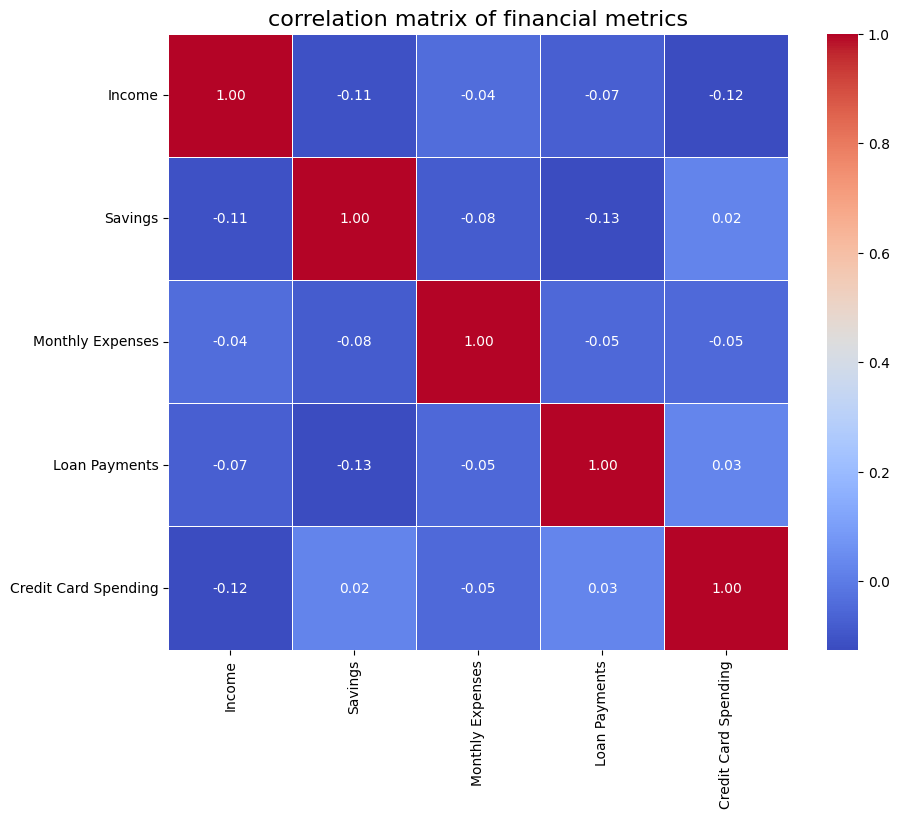

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation matrix of financial metrics',fontsize=16)
plt.show()

In [14]:
data['Savings_to_income'] = data['Savings'] / data['Income']
data['Expenses_to_income'] =data['Monthly Expenses'] / data['Income']
data['Loan_to_Income'] = data['Loan Payments'] / data['Income']
data['Credit_card_total_spending'] = data['Credit Card Spending'] / data['Amount']



In [15]:
data['savings_score'] = (data['Savings_to_income']*200).clip(upper=100)
data['Expenses_score'] = (100-(data['Expenses_to_income']*200)).clip(lower=0)
data['Loan_score'] = (100-(data['Loan_to_Income']*200)).clip(lower=0)
data['Credit_card_score'] = (100-(data['Credit_card_total_spending']*200)).clip(lower=0)
data['Financial_Goal_score'] = (data['Financial Goals Met (%)']).clip(lower=0,upper=100)


In [16]:
weights = {
    'savings_score':0.25,
    'Expenses_score':0.20,
    'Loan_score':0.15,
    'Credit_card_score':0.15,
    'Financial_Goal_score':0.10
}

In [17]:
data["Final_Score"] = (
    data['savings_score']*weights['savings_score'] +
    data['Expenses_score']*weights['Expenses_score']+
    data['Loan_score']*weights['Loan_score']+
    data['Credit_card_score']*weights['Credit_card_score']+
    data['Financial_Goal_score']*weights['Financial_Goal_score']
).round(2)
top_families =data[['Family ID','Final_Score']].sort_values(by='Final_Score',ascending=False).head()
top_families

,Family ID,Final_Score
9042,FAM115,66.65
9075,FAM115,66.65
9059,FAM115,66.65
9060,FAM115,66.65
9061,FAM115,66.65


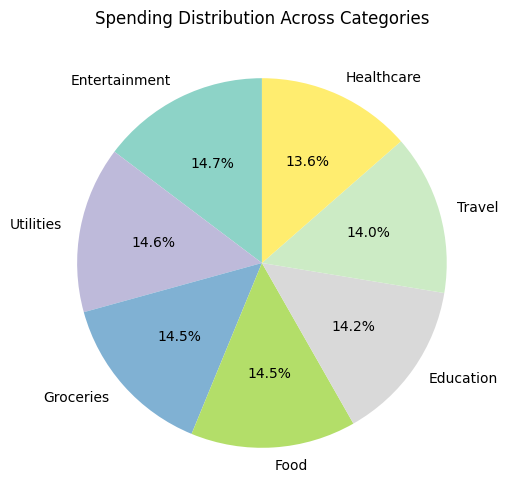

In [18]:
category_spending = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
category_spending.plot(kind='pie',autopct='%1.1f%%',startangle=90,colormap='Set3')
plt.title('Spending Distribution Across Categories')
plt.ylabel('')
plt.show()

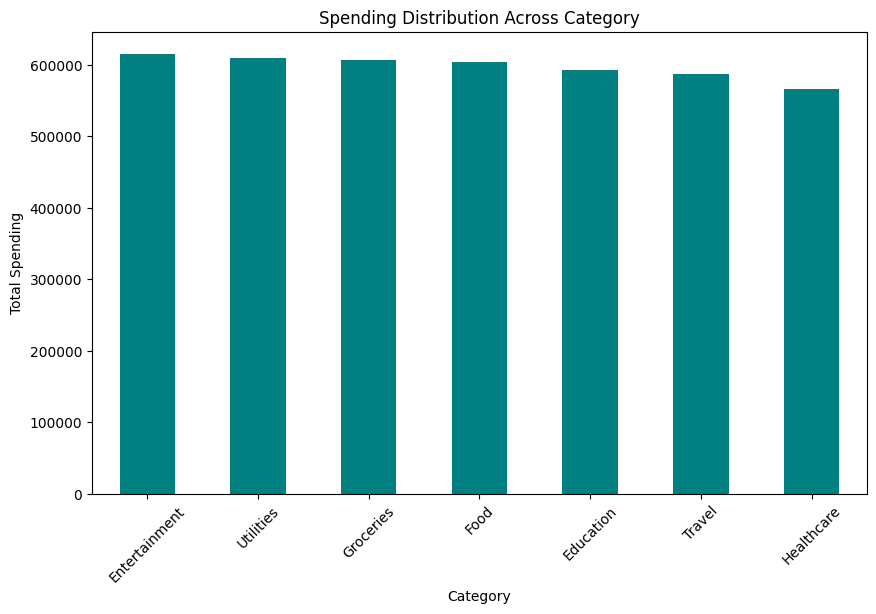

In [19]:
plt.figure(figsize=(10,6))
category_spending.plot(kind='bar',color='teal')
plt.title('Spending Distribution Across Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

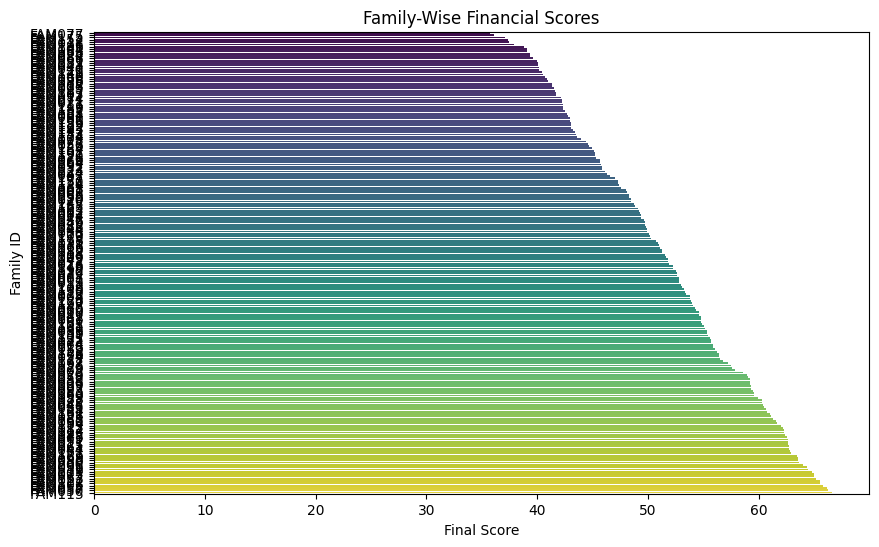

In [20]:
Family_score = data.groupby('Family ID')['Final_Score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x=Family_score.values,y=Family_score.index,palette='viridis',hue=Family_score.index)
plt.title('Family-Wise Financial Scores')
plt.xlabel('Final Score')
plt.ylabel('Family ID')
plt.show()

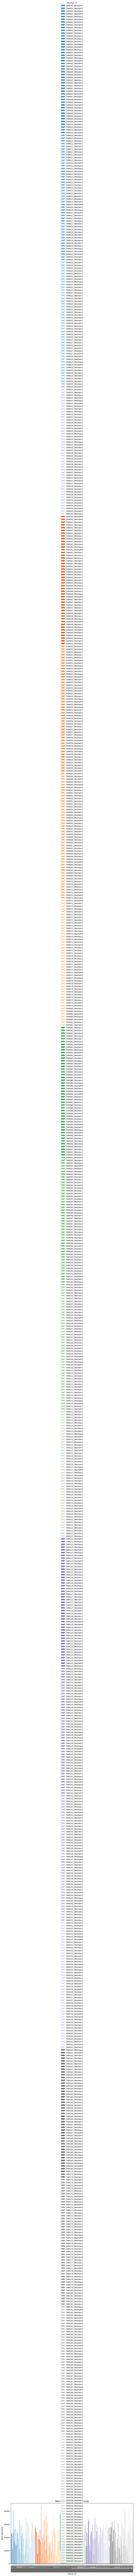

In [21]:
member_spending = data.groupby(['Family ID','Member ID'])['Amount'].sum().unstack()

member_spending.plot(kind='bar',stacked=True,figsize=(12,6),colormap='tab20c')
plt.title('Member-Wise Spending Trends')
plt.xlabel('Family ID')
plt.ylabel('Total Spending')
plt.show()

In [99]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.1 MB 12.6 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.1 MB 12.2 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/19.1 MB 12.6 MB/s eta 0:00:01
   -------------------- ------------------- 10.0/19.1 MB 12.7 MB/s eta 0:00:01
   -------------------------- ------------- 12.8/19.1 MB 12.6 MB/s eta 0:00:01
   -------------------------------- ------- 15.5/19.1 MB 12.6 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.1 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 11.5 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import plotly.express as px

category_df = data.groupby('Category',as_index=False)['Amount'].sum()
fig = px.pie(category_df,values='Amount',names='Category',title='Spending')
fig.show()


In [103]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
pip install --upgrade 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: You must give at least one requirement to install (see "pip help install")
